In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1. Loading Library

In [1]:
import numpy as np
import pandas as pd
import glob
import codecs
import requests
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/vikings-all-seasons-complete-script/04x12 - The Vision.txt
/kaggle/input/vikings-all-seasons-complete-script/06x10 - The Best Laid Plans.txt
/kaggle/input/vikings-all-seasons-complete-script/02x06 - Unforgiven.txt
/kaggle/input/vikings-all-seasons-complete-script/02x13 - Athelstans Journal Loyalty (webisode).txt
/kaggle/input/vikings-all-seasons-complete-script/04x10 - The Last Ship.txt
/kaggle/input/vikings-all-seasons-complete-script/05x18 - Baldur.txt
/kaggle/input/vikings-all-seasons-complete-script/03x05 - The Usurper.txt
/kaggle/input/vikings-all-seasons-complete-script/02x16 - Athelstans Journal Family (webisode).txt
/kaggle/input/vikings-all-seasons-complete-script/04x06 - What Might Have Been.txt
/kaggle/input/vikings-all-seasons-complete-script/06x07 - The Ice Maiden.txt
/kaggle/input/vikings-all-seasons-complete-script/02x14 - Athelstans Journal Sin (webisode).txt
/kaggle/input/vikings-all-seasons-complete-script/05x05 - The Prisoner.txt
/kaggle/input/vikings-a

# Loading Data & Merge all text file

In [2]:
filenames = glob.glob('/kaggle/input/vikings-all-seasons-complete-script/*.txt')

with open("output_file.txt", "w") as outfile:
    for filename in filenames:
        with open(filename, encoding='ISO-8859-1') as infile:
            contents = infile.read()
            outfile.write(contents)

In [3]:
r = open('output_file.txt', mode='r', encoding='ISO-8859-1')
r.read(1000)

'"x"\n"\n\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t(adsbygoogle = window.adsbygoogle || []).push({});\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\tLothbrok: Previously on Vikings...\nI must go back to England.\nShould have gone back a long time ago.\nBjorn: This is a map of the Roman Empire.\nI want to go there!\nFloki is building the boat.\nHvitserk has agreed to come with me as well as King Harald and his brother.\nWhat about you two?\nWe want to stay and protect our mother.\nIvar: You cannot tell my brothers\nI\'m not able to satisfy a woman.\n(SOBBING) I will never embarrass you! I swear!\nOur father was defeated.\nNobody loves him anymore.\nNobody believes in him.\nLagertha: I want you to be ready.\nWhy won\'t you tell me what we have to do?\nBecause I\'m not ready.\nYou abandoned me.\nPerhaps I\'ll explain my actions when we get to England.\nAsk me like you asked my brothers.\nIvar...\nOf course I\'ll come.\n(IF I HAD A HEART PLAYING)\n<U+266A> More, give me m

In [4]:
text = r.read().replace("\n", " ")

# Word Cloud

In [5]:
from PIL import Image

vikings = Image.open(requests.get("http://www.pngmart.com/files/5/Vikings-PNG-Picture.png", stream=True).raw)
vikings_mask = Image.new("RGB", vikings.size, (255,255,255))
vikings_mask.paste(vikings,vikings)
vikings_mask = np.array(vikings_mask)

(-0.5, 817.5, 1037.5, -0.5)

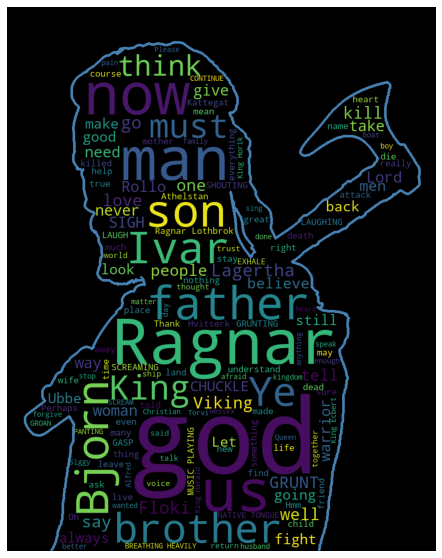

In [6]:
stopwords = set(STOPWORDS)
stopwords.add("266A")
stopwords.add("adsbygoogle")
stopwords.add("window")
stopwords.add("MUSIC PLAYING")
stopwords.add("want")
stopwords.add("will")
stopwords.add("know")
stopwords.add("come")
stopwords.add("see")
wordcloud = WordCloud(width = 881,
                      height = 1038,
                      max_words = 150,
                      stopwords = stopwords,
                      mask=vikings_mask,
                      background_color = "black",
                      contour_width=5,
                      contour_color='steelblue',
                      max_font_size = 200,
                      min_word_length= 2,
                      random_state=40
                     ).generate(text)

fig = plt.figure(figsize=(9,10))
plt.imshow(wordcloud)
plt.axis('off')